# 🧠 Prediction of a Alzheimer's Disease

## Part 1: Problem Statement
Alzheimer’s disease is a progressive neurodegenerative disorder that affects millions of people worldwide, primarily targeting the elderly population. It leads to memory loss, confusion, and difficulty in performing daily activities. Early detection of Alzheimer’s is crucial for better disease management and improving the quality of life for patients.

This project focuses on identifying whether a patient is suffering from Alzheimer’s disease based on various health and behavioral factors. **Leveraging a dataset collected from Kaggle with approximately 2,100 rows**, we aim to build a predictive model for early diagnosis.

## 1.1 Expected Outcome
The objective of this project is to create a machine learning model that can predict the presence of Alzheimer’s disease based on the following classification labels:

* 1 = Alzheimer’s disease present
* 0 = No Alzheimer’s disease

By analyzing behavioral, physiological, and lifestyle attributes, the model aims to assist healthcare professionals in diagnosing the disease with greater efficiency.

## 1.2 Objective
The data contains both continuous and categorical features, making this a binary classification problem.
The goal is to:
- Predict whether a patient has Alzheimer’s disease.
- Identify the most significant features influencing the diagnosis.
- Improve healthcare outcomes by providing early diagnostic insights.

> *Thus, the primary focus is on understanding the relationships between behavioral problems, functional impairments, and physiological health markers with Alzheimer’s diagnosis.*

## 1.3 Identify Data Sources
**The dataset, sourced from Kaggle, contains approximately 2,100 records of patient data.**

* Target Variable: Diagnosis (0 = No Alzheimer’s, 1 = Alzheimer’s present)
* Key Features: The dataset includes diverse attributes covering demographics, lifestyle, medical history, and cognitive assessments.

## Doctor, is he sick? does he have Alzheimer's disease? 😯🩺 <br>
Let's see.. <br> 
well, this algorithm can detect if the patient is sick <br>
## 1.4 To sum up
The most **relevant features** are as follows:
1. **Functional Assessment** (ranging from 0 to 10. Lower scores indicate greater impairment)
2. **ADL (Activities of Daily Living** score, ranging from 0 to 10. Lower scores indicate greater impairment)
3. **MMSE (Mini-Mental State Examination** score, ranging from 0 to 30. Lower scores indicate cognitive impairment)
4. **Memory Complaints**
5. **Behavioral Problems**


And there are some more (not so much contributing) features:  

6. Cholesterol HDL
7. Diet Quality
8. Sleep Quality
9. Alcohol Consumption
10. Cholesterol Triglycerides


# Binary Classification- workflow
Main steps:
- Exploratory Data Analysis (EDA): Visualize features' relationships and distributions. Check some statistics. 
- Data Preprocessing: Scale the cumulative features. Covert categorical features to binary.
- Model Training: Train some models on the preprocessed data (Models: Logistic Regression, Naive Bayes,LDA,QDA).
- Model Evaluation: Evaluate the models' performances.

In [2]:
#load libraries
import numpy as np        
import pandas as pd

### Load Dataset

First, load the supplied CSV file using additional options in the Pandas **`read_csv`** function. 

In [3]:
data = pd.read_csv("alzheimers_disease_data.csv")

### Inspect the data
Visually inspect the data set.

In [4]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
data.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,...,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [6]:
# Review data types with "info()"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
# Check for missing variables
data.isnull().sum().sum()

np.int64(0)

# Part 2: Exploratory Data Analysis (EDA)

## 2.1 Objectives of Data Exploration
Exploratory Data Analysis (EDA) is essential to understand the structure, distribution, and relationships in the dataset before modeling. For Alzheimer’s disease detection, EDA helps identify patterns, outliers, and correlations between features such as cognitive assessments, lifestyle factors, and medical history, which could be useful for predicting the target variable (Diagnosis).

>**Purpose of EDA:**
* Summarize data using descriptive statistics and visualizations.
*Detect issues like missing values, outliers, and skewed distributions.
*Identify features most relevant for Alzheimer's diagnosis.

>**Approaches for EDA**
1. ***Descriptive Statistics***
* Mean, Median, SD: Summarize continuous features like Age, MMSE, and BMI.
* Skewness/Correlation: Understand feature distributions and relationships with Diagnosis.
* Count/Mode: Analyze categorical features like Gender, Smoking, and Ethnicity.

2. ***Visualization***
* Histograms/Density Plots: Explore distributions of numerical features like Age, MMSE, and BMI.
* Boxplots: Identify outliers and variability in features like BP and Cholesterol.
* Pairplots/Heatmaps: Visualize relationships between features and Diagnosis.
* Bar Plots: Show distributions of categorical variables like Gender and Smoking.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

# 2.2 Descriptive statistics

In [9]:
# General descriptive statistics:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data['Diagnosis'].unique()

array([0, 1])

In [11]:
data['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [12]:
# Group by diagnosis and review the output:
diag_gr = data.groupby('Diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

C:\Users\zam\AppData\Local\Temp\ipykernel_14760\3807268237.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  diag_gr = data.groupby('Diagnosis', axis=0)


,# of observations
Diagnosis,
0,1389
1,760


In this case:
* Diagnosis = 1: Indicates the presence of Alzheimer's disease (or a positive diagnosis).
* Diagnosis = 0: Indicates the absence of Alzheimer's disease (or a negative diagnosis).

**The dataset has a total of 2149 observations.**
- 1389 observations have a diagnosis of 0 (absence of Alzheimer's disease).
- 760 observations have a diagnosis of 1 (presence of Alzheimer's disease).

# 2.3 Data Visualizations

## 2.3.1 Univariate Analysis
One of the main goals of visualizing the data here is to observe which features are most helpful in predicting target output. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Applying 3 techniques from seaborn library:
* Histograms.
* Density Plots.
* Box and Whisker Plots.

<Axes: xlabel='Diagnosis', ylabel='count'>

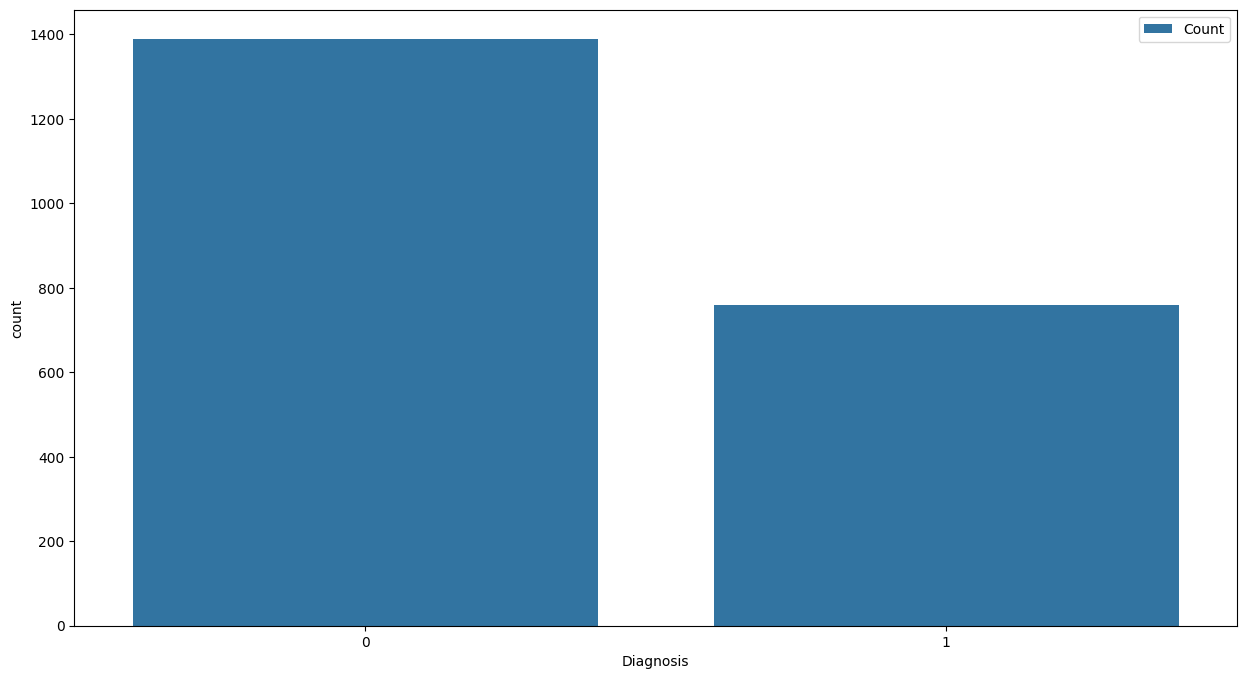

In [13]:
# Obtain the frequency of diagnosis
sns.countplot(x=data['Diagnosis'],label='Count')

## 2.3.2 Visualisation distribution of data via histograms, Density plot, Boxplot

C:\Users\zam\AppData\Local\Temp\ipykernel_14760\2176199178.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='MMSE', data=data, palette="Set2")


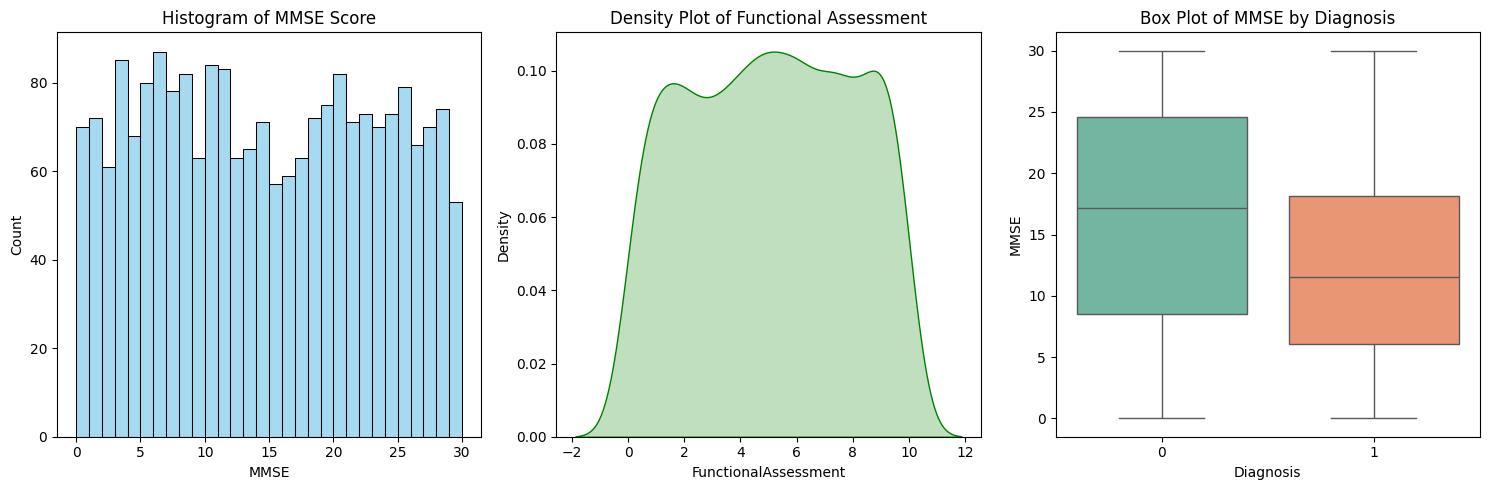

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['MMSE'], kde=False, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of MMSE Score')

plt.subplot(1, 3, 2)
sns.kdeplot(data['FunctionalAssessment'], fill=True, color='green')
plt.title('Density Plot of Functional Assessment')

plt.subplot(1, 3, 3)
sns.boxplot(x='Diagnosis', y='MMSE', data=data, palette="Set2")
plt.title('Box Plot of MMSE by Diagnosis')

# Show all plots
plt.tight_layout()
plt.show()

## 2.3.3 Visualise distribution of data via box plots on important values

C:\Users\zam\AppData\Local\Temp\ipykernel_14760\3326058247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=data, palette="Set2")
C:\Users\zam\AppData\Local\Temp\ipykernel_14760\3326058247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=data, palette="Set2")
C:\Users\zam\AppData\Local\Temp\ipykernel_14760\3326058247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=data, palette="Set2")
C:\Users\zam\AppData\Local\Temp\ipykernel_14760\3326

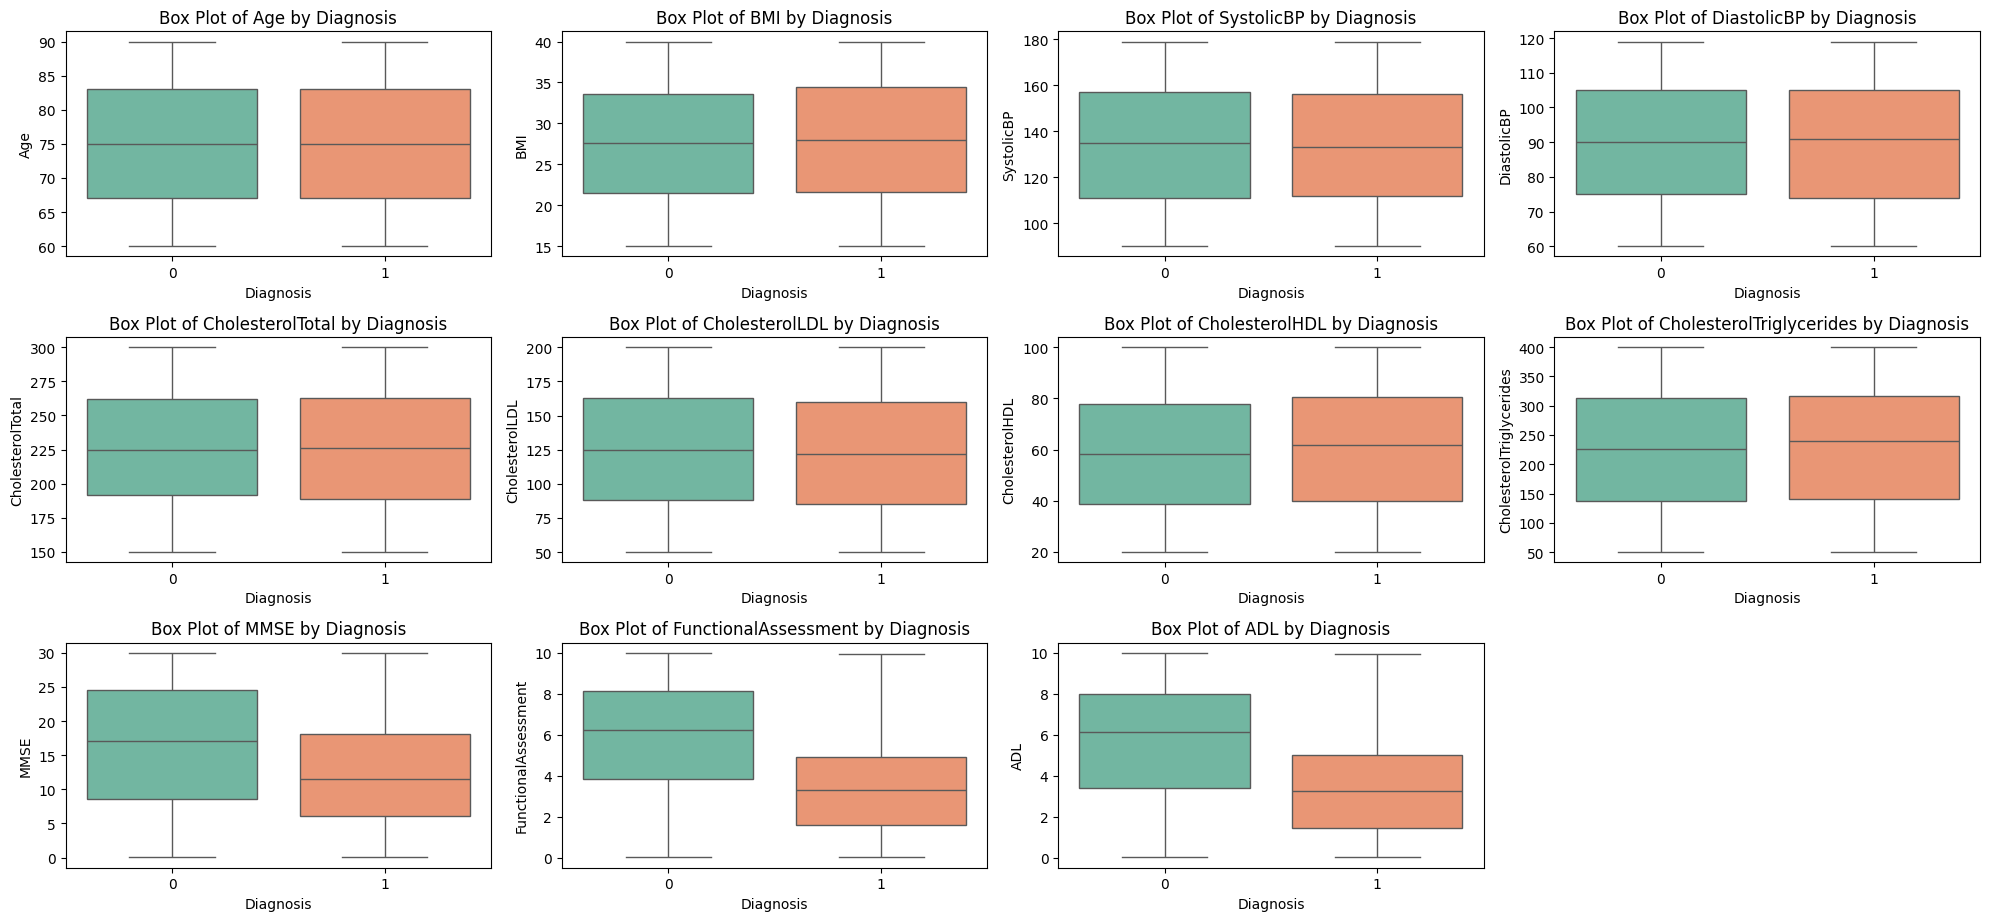

In [15]:
continuous_features = [
    'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 
    'MMSE', 'FunctionalAssessment', 'ADL']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(5, 4, i) 
    sns.boxplot(x='Diagnosis', y=feature, data=data, palette="Set2")
    plt.title(f'Box Plot of {feature} by Diagnosis')

plt.tight_layout()
plt.show()

# 2.4 Multimodal Data Visualizations

## 2.4.1 Bivariate Analysis/Multivariate Analysis
Construct:
* Scatter plots
* Correlation matrix

### Scatter plots

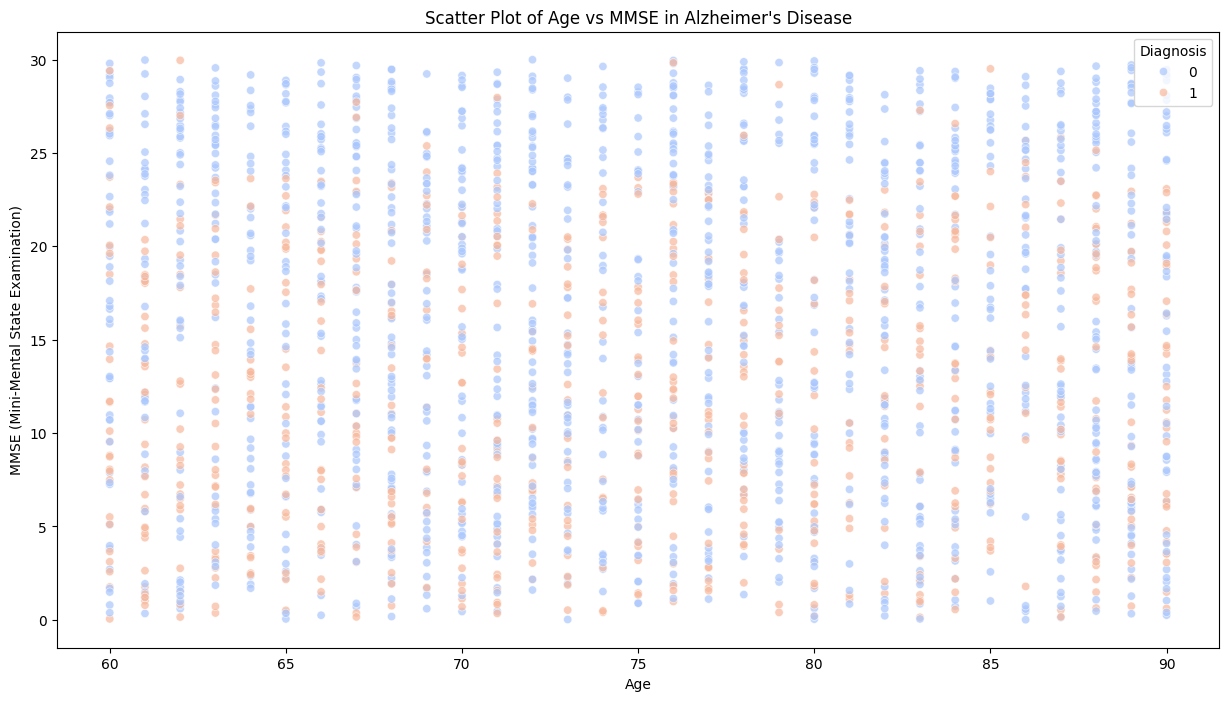

In [16]:
# Scatter plot between Age and MMSE
sns.scatterplot(data=data, x='Age', y='MMSE', hue='Diagnosis', palette='coolwarm', alpha=0.7)

# Adding titles and labels
plt.title('Scatter Plot of Age vs MMSE in Alzheimer\'s Disease')
plt.xlabel('Age')
plt.ylabel('MMSE (Mini-Mental State Examination)')

# Show plot
plt.show()

### Correlation matrix

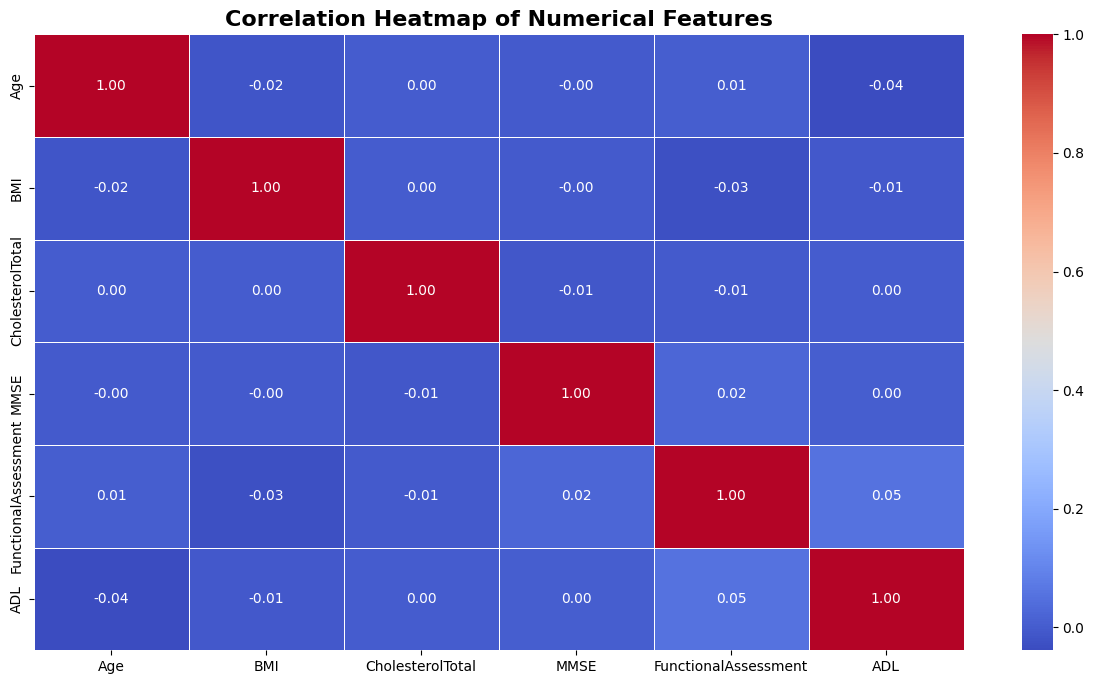

In [17]:
# Select numerical features for correlation analysis
numerical_features = ['Age', 'BMI', 'CholesterolTotal', 'MMSE', 'FunctionalAssessment', 'ADL']

# Compute the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# ProfileReport library - Easiest way to understand Dataset
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")
profile

**Strong Positive Correlations (r between 0.75 and 1):**
     Variables with high correlation coefficients are likely to have a meaningful relationship.

 * Parameters like Functional Assessment and ADL (Activities of Daily Living) may show strong positive correlations, indicating that reduced functional abilities are predictive of Alzheimer's progression.

**Moderate Positive Correlations (r between 0.5 and 0.75):**
 * Certain features like MMSE (Mini-Mental State Examination) scores and ADL may moderately correlate, reflecting cognitive decline affecting daily activities.

**Strong Negative Correlations (r between -0.75 and -1):**
 * Negative correlations might exist between age-related biomarkers or lifestyle factors and functional or cognitive abilities. For instance: Fractal dimension-based measurements (if any structural imaging data is included) might negatively correlate with performance scores on tests like MMSE.

> **Parameters Relevant to Classification:**
- Features such as MMSE scores, Functional Assessment, and ADL scores are likely pivotal for distinguishing Alzheimer's stages or risk categories (mild cognitive impairment, moderate, severe, etc.).
- Larger values of certain physical/clinical biomarkers might correlate with disease severity.

> **Parameters Without Diagnostic Significance:**
- Some features like Cholesterol Total, BMI, or lifestyle factors might not show a clear preference or strong relationship with Alzheimer's diagnosis, based on this correlation heatmap.

> **Absence of Large Outliers:**
- No large outliers in histograms of variables suggest that the dataset is clean and ready for modeling without extensive preprocessing.

# Part 3: Pre-Processing the data
Data preprocessing is a crucial step for any data analysis problem.  It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:
* Assigning numerical values to categorical data;
* Handling missing values; and
* Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X = data.drop(columns=['Diagnosis','PatientID','DoctorInCharge'])
y = data['Diagnosis']

In [20]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
columns=X.columns.tolist()
columns

['Age',
 'Gender',
 'Ethnicity',
 'EducationLevel',
 'BMI',
 'Smoking',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness']

In [22]:
X

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,20.613267,7.118696,0,0,2.592424,0,0,0,0,1
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,13.517609,6.045039,0,0,0.014691,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,1.201190,0.238667,0,0,4.492838,1,0,0,0,0
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,6.458060,8.687480,0,1,9.204952,0,0,0,0,0
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,17.011003,1.972137,0,0,5.036334,0,0,0,0,0
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,4.030491,5.173891,0,0,3.785399,0,0,0,0,1


### Feature standardization & encoding:

In [23]:
scaler=StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)   

In [25]:
X_test= scaler.transform(X_test)

In [26]:
X_test[:2]

array([[-1.46093536, -1.00291291, -0.70861613, -0.32869362,  1.34335798,
        -0.63322823,  1.71685465, -1.15505043,  1.35309168, -1.72586154,
        -0.58563534, -0.40963266, -0.41253339,  1.99564744, -0.31032406,
        -0.42596162, -0.11149296, -0.43237483,  0.40529899,  0.41632951,
        -1.10625282, -0.54678899,  1.52745677,  0.06777257, -0.50834903,
        -0.436398  , -1.0141433 ,  1.97419247, -0.4448701 , -0.42118554,
        -0.42881732, -0.65946303],
       [-1.01238026,  0.99709555, -0.70861613,  0.77486952, -0.75417791,
        -0.63322823,  0.7657555 ,  1.09161919, -1.22149383,  1.40107718,
         1.70754723, -0.40963266, -0.41253339,  1.99564744, -0.31032406,
        -0.42596162,  0.04232437,  0.92972474, -0.78424494,  1.22395727,
         0.27869746, -0.2369894 , -0.45959972, -0.49826511, -0.50834903,
        -0.436398  ,  0.08835762,  1.97419247, -0.4448701 , -0.42118554,
        -0.42881732, -0.65946303]])

# Part 4: Predictive Models

Construct a pipeline and train the following classification models discussed in class:
1. Logistic 

2. LDA

3. QDA

4.  Naive Bayes


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

In [28]:
# To save time and space, we will train and test all models jointly. Define a classifier dictionary:
clf_dict = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=10000, random_state=1),
    'Naive Bayes': GaussianNB(), 
    'LDA': LDA(),
    'QDA': QDA()
}

In [29]:
# Function to train the models and evaluate their performance
def train_and_evaluate(X_train, y_train, X_test, y_test, classifiers):
    results = {}
    
    for model_name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else clf.decision_function(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        
        # AUC score, if possible
        auc = roc_auc_score(y_test, y_prob) if hasattr(clf, 'predict_proba') else None
        
        # Store the results in the dictionary
        results[model_name] = {
            'Accuracy': accuracy,
            'Confusion Matrix': cm,
            'Classification Report': cr,
            'AUC': auc
        }
    
    return results

In [30]:
# Train and evaluate models
model_results = train_and_evaluate(X_train, y_train, X_test, y_test, clf_dict)

In [31]:
# Display the results for each model
for model_name, result in model_results.items():
    print(f"Results for {model_name}:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Classification Report:\n{result['Classification Report']}")
    if result['AUC'] is not None:
        print(f"AUC: {result['AUC']:.4f}")
    print("-" * 80)

Results for Logistic Regression:
Accuracy: 0.8093
Confusion Matrix:
[[226  51]
 [ 31 122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       277
           1       0.71      0.80      0.75       153

    accuracy                           0.81       430
   macro avg       0.79      0.81      0.80       430
weighted avg       0.82      0.81      0.81       430

AUC: 0.8882
--------------------------------------------------------------------------------
Results for Naive Bayes:
Accuracy: 0.7651
Confusion Matrix:
[[227  50]
 [ 51 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       277
           1       0.67      0.67      0.67       153

    accuracy                           0.77       430
   macro avg       0.74      0.74      0.74       430
weighted avg       0.76      0.77      0.76       430

AUC: 0.8431
---------------------

In [32]:
clf_dict['Logistic Regression'].coef_

array([[-0.11806909,  0.02645804, -0.05659213, -0.03800396, -0.02619686,
        -0.11316101, -0.08413344, -0.02491761,  0.02334561, -0.11924388,
        -0.0927568 ,  0.06003474, -0.01594082, -0.04430296, -0.0886005 ,
         0.0436225 , -0.00297877,  0.01850635,  0.05878465, -0.15846421,
         0.15626714,  0.06827552, -0.84349062, -1.24605906,  1.05533577,
         0.92641879, -1.20270014, -0.04426492, -0.08131183, -0.01728648,
         0.04368066, -0.06363091]])

In [33]:
clf_dict['LDA'].coef_

array([[-0.13009744,  0.04225112, -0.06321699, -0.06028588, -0.01287228,
        -0.12647191, -0.08485136,  0.01403893,  0.03176472, -0.13603739,
        -0.0793859 ,  0.05166327, -0.02583851, -0.02868808, -0.08571047,
         0.04699591, -0.0125897 ,  0.00203284,  0.03740571, -0.14369839,
         0.14507096,  0.07795724, -0.89519865, -1.24659352,  1.14898248,
         0.93789815, -1.1993152 , -0.02124424, -0.0939277 , -0.02360482,
         0.00721073, -0.03963686]])

# Part 5: Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

## Evaluate models using test data based on following metrics:

1. Gini

2. Accuracy

3. Recall

4. Precision

5. F1-score

In [35]:
def predict(X, fitted_dict):
    # Empty DataFrame with keys according to the classifier models
    df = pd.DataFrame(columns=fitted_dict.keys())
    
    for key, clf in fitted_dict.items():
        # Check if the classifier has 'predict_proba' method
        if hasattr(clf, "predict_proba"):
            # For classifiers like Logistic Regression, Naive Bayes, etc., use predict_proba
            prob_pos = clf.predict_proba(X)[:, 1]  # The predicted probabilities for the positive class (1)
        else:
            # For classifiers like LDA, QDA, etc., use decision_function and normalize
            prob_pos = clf.decision_function(X)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        
        # Store the predicted probabilities for the current classifier
        df[key] = pd.Series(prob_pos).transpose()
    
    return df

In [36]:
pred_probs = predict(X_test, clf_dict)

In [37]:
pred_probs.head()

,Logistic Regression,Naive Bayes,LDA,QDA
0,0.170360,0.099823,0.100206,0.017163
1,0.255035,0.141079,0.173969,0.133395
2,0.380346,0.533153,0.266664,0.490694
3,0.051986,0.018897,0.022542,0.015624
4,0.654525,0.303820,0.454628,0.244938


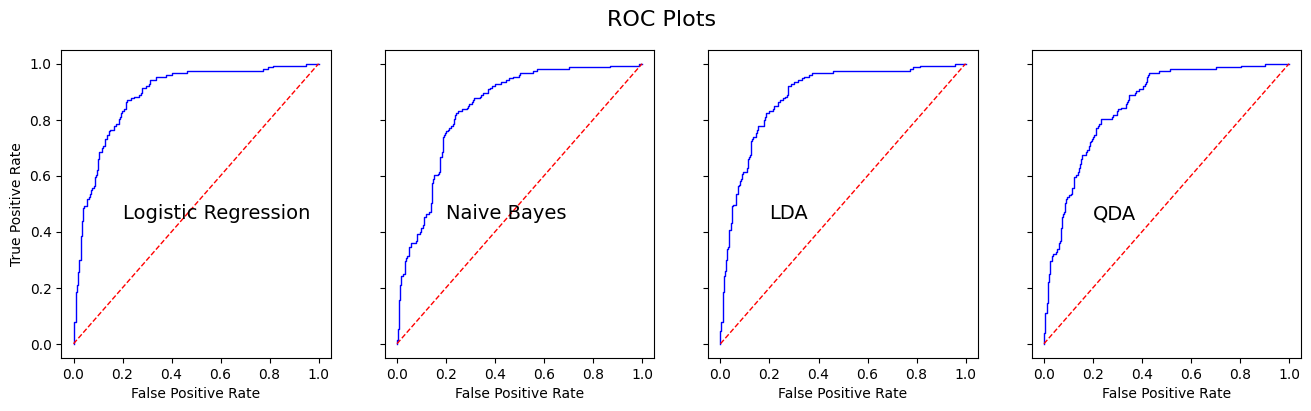

In [38]:
K=len(pred_probs.columns)
fig, ax = plt.subplots(1, K, figsize=(16,4), sharey=True)
fig.suptitle("ROC Plots", fontsize=16)
i=0  
for col in pred_probs.columns:
    fpr, tpr, thresholds = roc_curve(y_test, pred_probs[col])
    ax[i].plot(fpr, tpr, color='blue', lw=1) 
    ax[i].plot([0,1],[0,1], linestyle='dashed', c='red', lw=1)
    ax[i].text(0.2, 0.5, col, fontsize=14, verticalalignment='top')                
    ax[i].set_xlabel('False Positive Rate')   
    i+=1    
ax[0].set_ylabel('True Positive Rate')
plt.show()    
    

In [39]:
auc_r={}
for col in pred_probs.columns:   
    auc_r[col]=roc_auc_score(y_test, pred_probs[col])
    print(f'{col} area under ROC: {auc_r[col]}')

Logistic Regression area under ROC: 0.8882046199948089
Naive Bayes area under ROC: 0.8430900639437485
LDA area under ROC: 0.8874495646634105
QDA area under ROC: 0.8529765696892476


In [40]:
# The best performer is logistic regression followed by LDA, then QDA and QDA

In [41]:
for col in pred_probs.columns:
    print(f'{col} Gini: {round(2*auc_r[col]-1,2)*100}%')

Logistic Regression Gini: 78.0%
Naive Bayes Gini: 69.0%
LDA Gini: 77.0%
QDA Gini: 71.0%


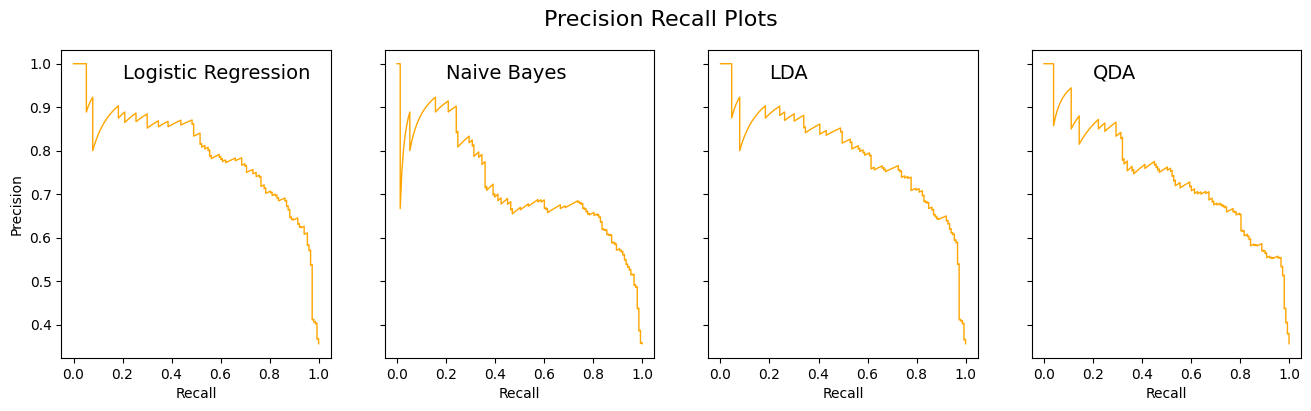

In [42]:
K=len(pred_probs.columns)
fig, ax = plt.subplots(1, K, figsize=(16,4), sharey=True)
fig.suptitle("Precision Recall Plots", fontsize=16)
i=0  
for col in pred_probs.columns:
    precision, recall, thresholds = precision_recall_curve(y_test, pred_probs[col])
    ax[i].plot(recall, precision, c='orange', lw=1)
    ax[i].text(0.2,1,col, fontsize=14, verticalalignment='top')                
    ax[i].set_xlabel('Recall')   
    i+=1    
ax[0].set_ylabel('Precision')
plt.show()    

In [43]:
auc_score={}
for col in pred_probs.columns:     
    auc_score[col]=auc(recall, precision)
    print(f'{col} area under Precision-Recall: {auc_score[col]}')

Logistic Regression area under Precision-Recall: 0.7412762751957153
Naive Bayes area under Precision-Recall: 0.7412762751957153
LDA area under Precision-Recall: 0.7412762751957153
QDA area under Precision-Recall: 0.7412762751957153


## Optimal Classification Thresholds

In [44]:
def f1_threshold(precision, recall, thresholds):
    numer = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numer, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    thresh_id=np.argmax(f1_scores)
    max_f1_thresh = thresholds[thresh_id]
    return max_f1_thresh, max_f1, thresh_id

In [45]:
def optimal_f1_score(X,y,fitted_dict):
    K=len(fitted_dict.keys())
    fig, ax = plt.subplots(1, K, figsize=(16,4), sharey=True)
    fig.suptitle("Precision-Recall Rates versus Threshold", fontsize=16)
    i=0     
    thresh=[]
    score=[]
    for key, clf in fitted_dict.items():
        pred_probs=clf.predict_proba(X)[:,1]
        precision, recall, thresholds = precision_recall_curve(y, pred_probs, pos_label=1)
        max_f1_thresh, max_f1, thresh_id=f1_threshold(precision, recall, thresholds)
        thresh.append(max_f1_thresh)
        score.append(max_f1)
        thresholds = np.append(thresholds, 1)
        ax[i].plot(thresholds, precision, color=sns.color_palette()[0], lw=2) 
        ax[i].plot(thresholds, recall, color=sns.color_palette()[1], lw=2)
        ax[i].scatter(max_f1_thresh, precision[thresh_id], c='k', lw=2)
        ax[i].scatter(max_f1_thresh, recall[thresh_id], c='k', lw=2)
        ax[i].text(0.5, 0.5, key, fontsize=14, verticalalignment='top')        
        ax[i].set_xlabel('Probability Threshold')   
        i+=1
    ax[0].legend(('Precision', 'Recall'), fontsize=14)
    ax[0].set_ylabel('%')
    plt.show()    
    thresh_df=pd.DataFrame({'Model':fitted_dict.keys(), 'Threshold': thresh, 'F1-score': score})
    return thresh_df

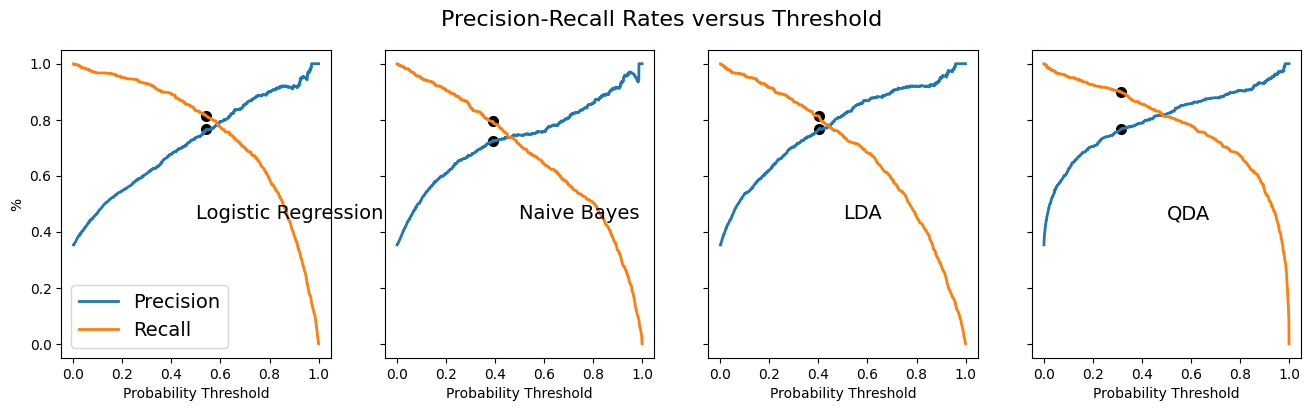

In [46]:
f1_thresholds=optimal_f1_score(X_train,y_train,clf_dict)

In [47]:
f1_thresholds

,Model,Threshold,F1-score
0,Logistic Regression,0.542930,0.789137
1,Naive Bayes,0.391031,0.757266
2,LDA,0.403628,0.789432
3,QDA,0.315165,0.828528


In [48]:
def roc_threshold(fpr, tpr, thresholds):
    g_means = np.sqrt(tpr*(1-fpr))
    max_g = np.max(g_means)
    thresh_id=np.argmax(g_means)
    max_thresh = thresholds[thresh_id]
    return max_thresh, max_g, thresh_id

In [49]:
def optimal_roc_auc_score(X,y,fitted_dict):
    K=len(fitted_dict.keys())
    fig, ax = plt.subplots(1, K, figsize=(16,4), sharey=True)
    fig.suptitle("ROC Plots and Optimal Thresholds", fontsize=16)
    i=0     
    thresh=[]
    score=[]
    for key, clf in fitted_dict.items():
        pred_probs=clf.predict_proba(X)[:,1]
        fpr, tpr, thresholds = roc_curve(y, pred_probs)
        max_thresh, max_g, thresh_id=roc_threshold(fpr, tpr, thresholds)
        thresh.append(max_thresh)
        score.append(max_g)
        thresholds = np.append(thresholds, 1)
        ax[i].plot(fpr, tpr, color='blue', lw=2) 
        ax[i].plot([0,1],[0,1], linestyle='dashed', c='red', lw=2)
        ax[i].scatter(fpr[thresh_id], tpr[thresh_id], c='k', lw=1)
        ax[i].text(0.2, 0.5, key, fontsize=14, verticalalignment='top')                
        ax[i].set_xlabel('False Positive Rate')   
        i+=1    
    ax[0].set_ylabel('True Positive Rate')
    plt.show()    
    thresh_df=pd.DataFrame({'Model':fitted_dict.keys(), 'Threshold': thresh, 'Gmeans-score': score})
    return thresh_df

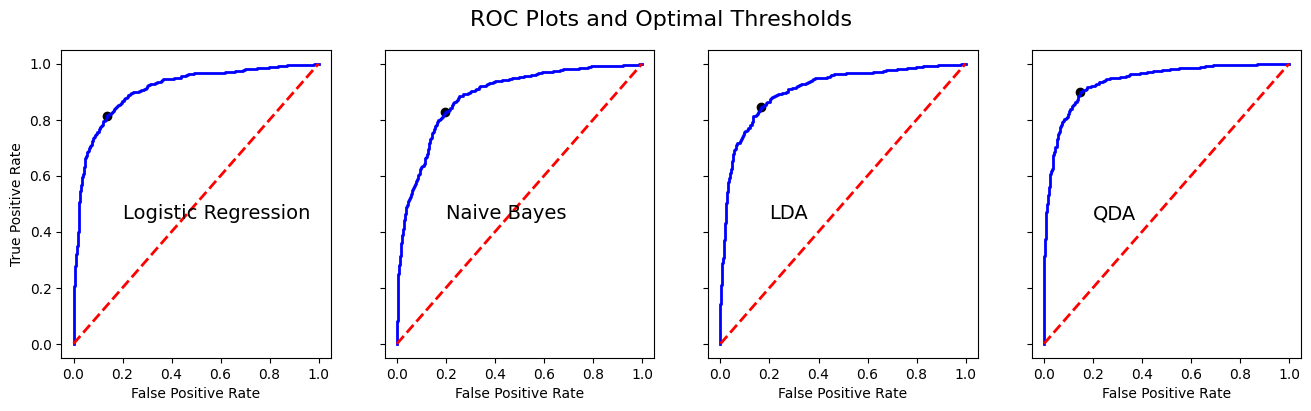

In [50]:
roc_thresholds=optimal_roc_auc_score(X_train,y_train,clf_dict)

In [51]:
roc_thresholds

,Model,Threshold,Gmeans-score
0,Logistic Regression,0.542930,0.838646
1,Naive Bayes,0.338795,0.815761
2,LDA,0.344609,0.838914
3,QDA,0.315165,0.875235


## Scoring and Performance Comparison 

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [53]:
test_probs_predicted = predict(X_test, clf_dict)
test_probs_predicted.head()

,Logistic Regression,Naive Bayes,LDA,QDA
0,0.170360,0.099823,0.100206,0.017163
1,0.255035,0.141079,0.173969,0.133395
2,0.380346,0.533153,0.266664,0.490694
3,0.051986,0.018897,0.022542,0.015624
4,0.654525,0.303820,0.454628,0.244938


In [54]:
def test_scores(y_test, test_probs_predicted, thresholds_df):
    '''
    Loops through dictionaries of predicted probabilities and scores them against the actual class observations
    '''
    test_f1_scores = []
    test_recall_scores = []
    test_pre_scores = []
    test_roc_auc_scores = []
    test_acc_scores = []   
    
    models=thresholds_df['Model'].tolist()
    thresholds=thresholds_df['Threshold'].tolist()

    for model, threshold in zip(models, thresholds):
        prob_list = test_probs_predicted[model].tolist()
        test_class = [1 if i > threshold else 0 for i in prob_list]
        
        test_f1 = f1_score(y_test,test_class, average='binary')
        test_f1_scores.append(round(test_f1,4))
        
        test_recall = recall_score(y_test, test_class)
        test_recall_scores.append(round(test_recall,4))
        
        test_pre = precision_score(y_test,  test_class)
        test_pre_scores.append(round(test_pre,4))   
        
        test_roc_auc =roc_auc_score(y_test,  test_class)
        test_roc_auc_scores.append(round(test_roc_auc,4))
                
        test_acc = accuracy_score(y_test,  test_class)
        test_acc_scores.append(round(test_acc,4))
        
    # Create results dataframe
    results = pd.DataFrame({'Model': models,                            
                            'Test ROC-AUC': test_roc_auc_scores,
                            'Test F1': test_f1_scores,
                            "Test Recall" : test_recall_scores,
                            'Test Precision': test_pre_scores,
                            'Test Accuracy': test_acc_scores,
                            })

    return results

In [55]:
results_f1=test_scores(y_test, test_probs_predicted, f1_thresholds)
results_f1

,Model,Test ROC-AUC,Test F1,Test Recall,Test Precision,Test Accuracy
0,Logistic Regression,0.8083,0.7524,0.7647,0.7405,0.8209
1,Naive Bayes,0.7744,0.7095,0.7582,0.6667,0.7791
2,LDA,0.8065,0.7500,0.7647,0.7358,0.8186
3,QDA,0.7770,0.7126,0.7778,0.6575,0.7767


In [56]:
results_roc=test_scores(y_test, test_probs_predicted, roc_thresholds)
results_roc

,Model,Test ROC-AUC,Test F1,Test Recall,Test Precision,Test Accuracy
0,Logistic Regression,0.8083,0.7524,0.7647,0.7405,0.8209
1,Naive Bayes,0.7832,0.7198,0.7974,0.6559,0.7791
2,LDA,0.8114,0.7538,0.8105,0.7045,0.8116
3,QDA,0.7770,0.7126,0.7778,0.6575,0.7767


In [57]:
def confusion_matrices(y_test, test_probs_predicted, thresholds_df):
    '''
    Loops through dictionaries of predicted probabilities and produces confusion matrices
    '''    
    models=thresholds_df['Model'].tolist()
    thresholds=thresholds_df['Threshold'].tolist()
    K=len(models)
    fig, ax = plt.subplots(1, K, figsize=(16,4), sharey=True)
    fig.suptitle("Confusion Matrices", fontsize=16)
    i=0     
    for model, threshold in zip(models, thresholds):
        prob_list = test_probs_predicted[model].tolist()
        test_class = [1 if i > threshold else 0 for i in prob_list]
        sns.heatmap(data=confusion_matrix(y_test ,test_class, normalize='true'), ax=ax[i], annot=True)
        ax[i].set_xlabel(model)
        i+=1
    plt.show()

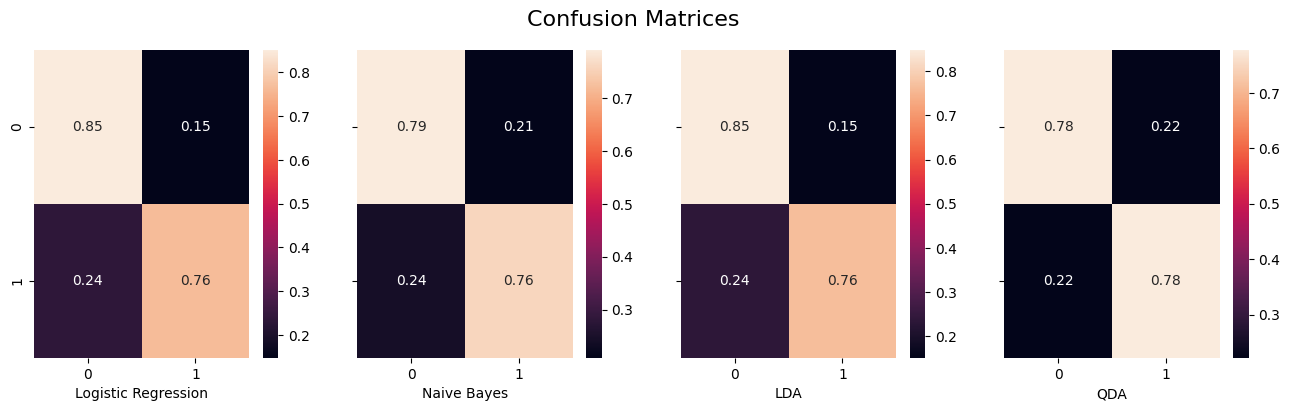

In [58]:
confusion_matrices(y_test, test_probs_predicted, f1_thresholds)

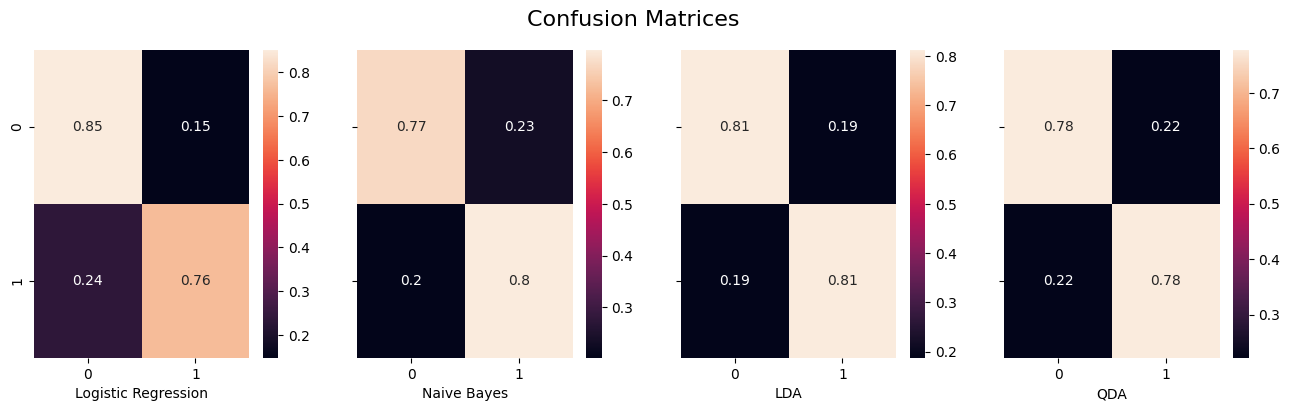

In [59]:
confusion_matrices(y_test, test_probs_predicted, roc_thresholds)